## Practical Example

### Importing relevant libraries

In [64]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

### Load Data

In [5]:
df=pd.read_csv('datasets/Real-life example.csv')

In [7]:
df.sample(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
686,Audi,2200.0,sedan,250,NaN,Diesel,no,2001,A6
3999,Renault,6700.0,van,160,1.5,Diesel,yes,2012,Kangoo
2992,BMW,NaN,crossover,0,3.0,Diesel,yes,2016,X5
618,Audi,2550.0,sedan,370,2.5,Diesel,no,1998,A6
3369,Mercedes-Benz,83000.0,crossover,70,3.0,Diesel,yes,2013,GL 350


## Preprocessing

## Excploring descriptive statistics

In [9]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining variables of interest

In [10]:
df=df.drop(['Model'],axis=1)


In [11]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Null Values

In [12]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [14]:
df=df.dropna(axis=0)

In [15]:
df.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [16]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring PDFs

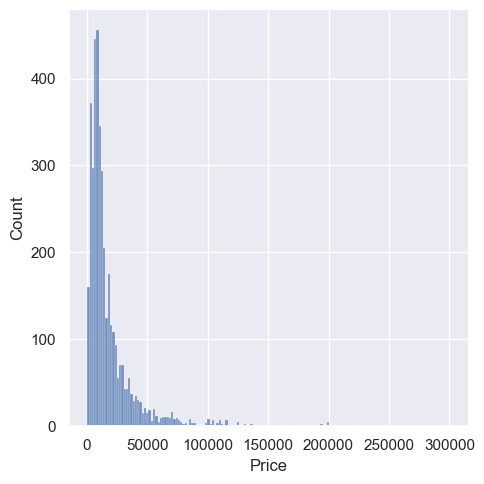

In [17]:
sns.displot(df['Price'])

### Dealing with outliers

In [21]:
q=df['Price'].quantile(0.99)
df=df[df['Price']<q]

In [25]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


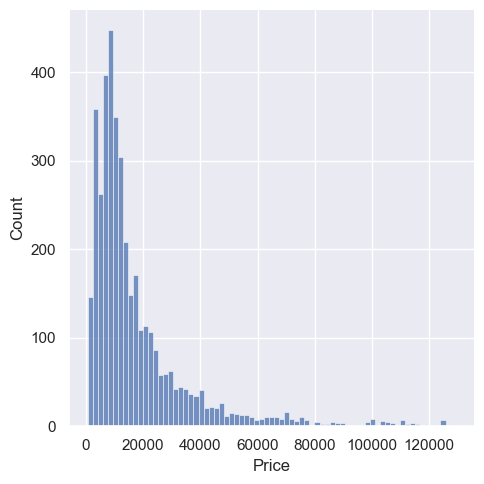

In [26]:
sns.displot(df['Price'])

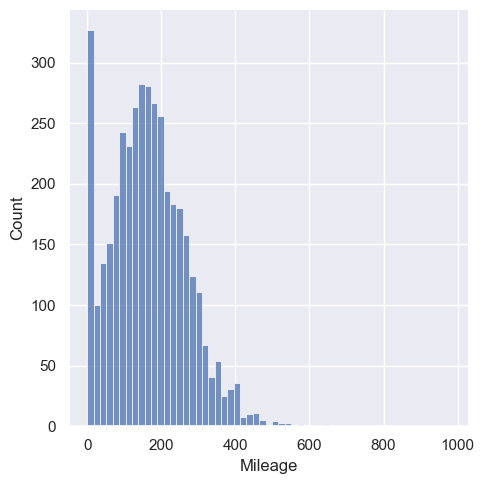

In [27]:
sns.displot(df['Mileage'])

In [28]:
q=df['Mileage'].quantile(0.99)
df=df[df['Mileage']<q]

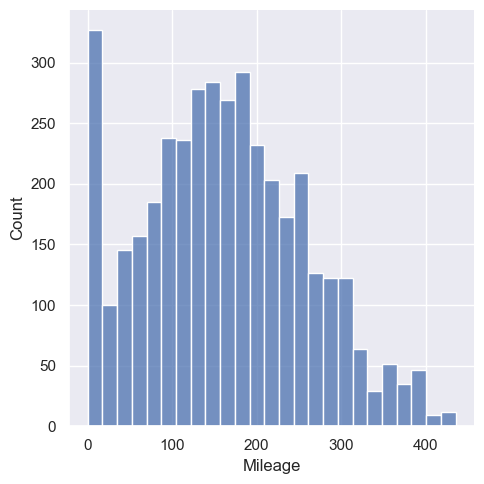

In [29]:
sns.displot(df['Mileage'])

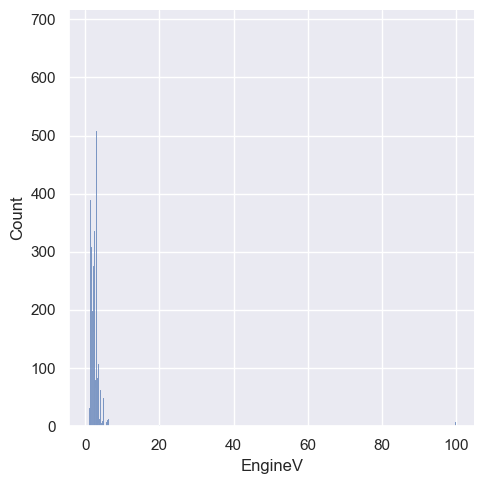

In [30]:
sns.displot(df['EngineV'])

In [31]:
df=df[df['EngineV']<6.5]

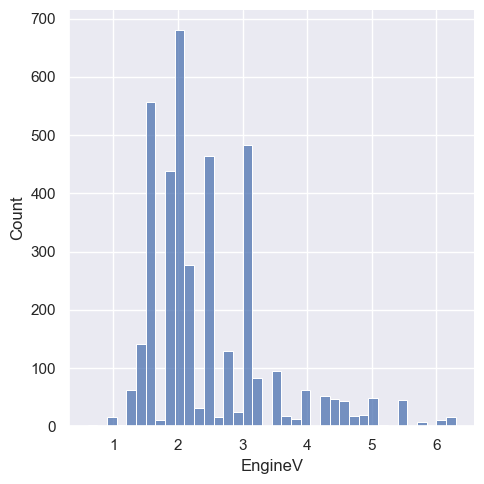

In [32]:
sns.displot(df['EngineV'])

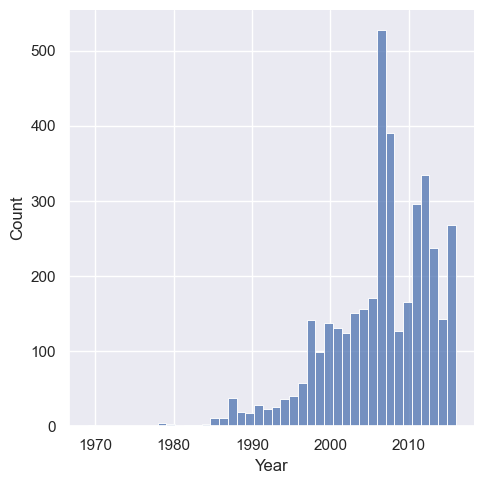

In [33]:
sns.displot(df['Year'])

In [34]:
q=df['Year'].quantile(0.01)
df=df[df['Year']>q]

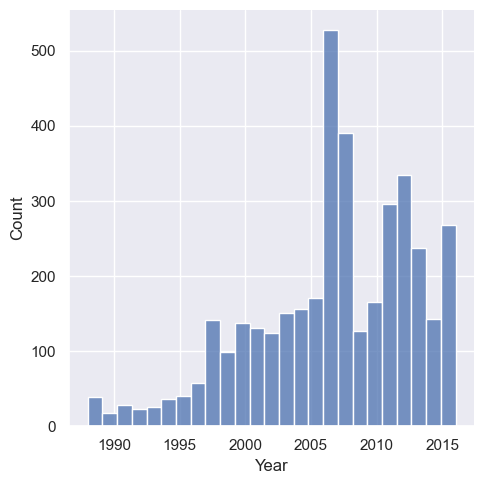

In [35]:
sns.displot(df['Year'])

In [36]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking OLS assumptions

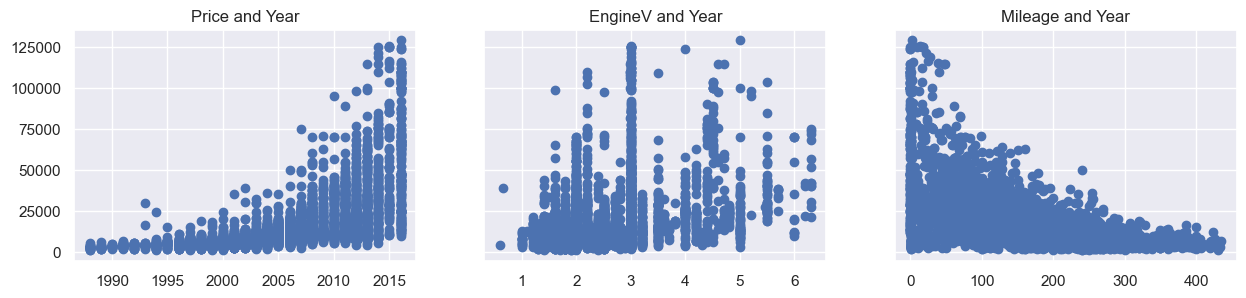

In [39]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(df['Year'],df['Price'])
ax1.set_title('Price and Year')
ax2.scatter(df['EngineV'],df['Price'])
ax2.set_title('EngineV and Year')
ax3.scatter(df['Mileage'],df['Price'])
ax3.set_title('Mileage and Year')

plt.show()

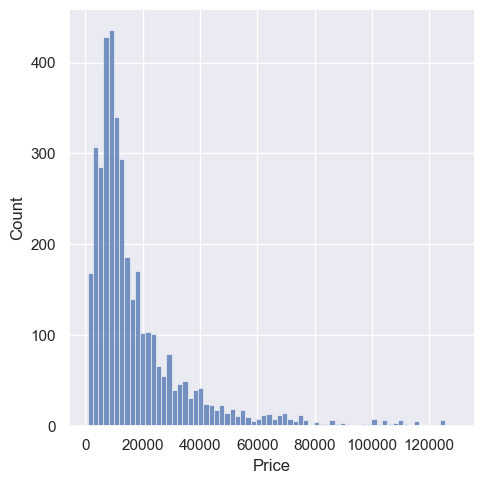

In [42]:
sns.displot(df['Price'])

### Relaxing Assumptions

In [40]:
log_price=np.log(df['Price'])
df['log_price']=log_price

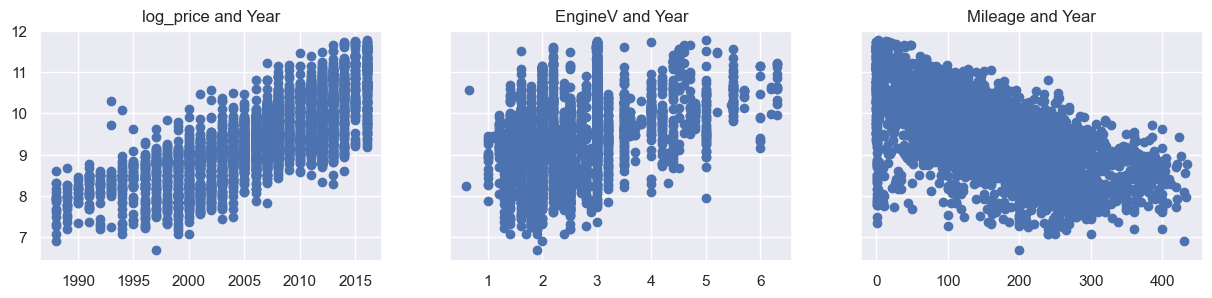

In [43]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(df['Year'],df['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(df['EngineV'],df['log_price'])
ax2.set_title('EngineV and Year')
ax3.scatter(df['Mileage'],df['log_price'])
ax3.set_title('Mileage and Year')

plt.show()

In [44]:
df=df.drop('Price',axis=1)

In [45]:
df.sample(5)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
2091,Mitsubishi,sedan,57,1.5,Gas,yes,2011,9.259131
1659,Toyota,crossover,240,2.7,Gas,yes,2007,9.788918
3959,Audi,sedan,380,2.8,Petrol,yes,1997,8.294050
1840,Mercedes-Benz,other,250,3.0,Diesel,yes,2008,10.239960
809,Volkswagen,crossover,200,2.5,Diesel,yes,2006,9.461099


### Multicollinarity

In [46]:
df.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [48]:
df.corr()

,Mileage,EngineV,Year,log_price
Mileage,1.000000,0.005710,-0.715361,-0.614806
EngineV,0.005710,1.000000,-0.020152,0.411935
Year,-0.715361,-0.020152,1.000000,0.746907
log_price,-0.614806,0.411935,0.746907,1.000000


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=df[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [51]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


### VIF = 1 [no multicolinearity]
### 1 < VIF < 5 [perfect]
### 10 < VIF     [unacceptable]

In [52]:
df=df.drop('Year',axis=1)

In [53]:
df.sample(5)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
1191,Volkswagen,van,260,2.5,Diesel,yes,9.082507
3828,Volkswagen,hatch,160,2.0,Diesel,no,8.455318
646,Volkswagen,sedan,272,1.9,Diesel,no,7.696213
3361,Toyota,sedan,88,2.5,Petrol,yes,9.994242
26,Audi,sedan,330,2.4,Petrol,yes,8.779557


### Create Dummy Variables

In [54]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [55]:
df_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Rearrange

In [56]:
df_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [57]:
cols=['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [58]:
df=df_dummies[cols]

In [60]:
df.sample(5)

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
2793,8.846497,320,4.4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3724,11.665647,25,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4050,9.121509,220,2.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3538,9.729134,154,2.7,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
836,10.633449,176,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Linear Regression Model

### Declare the inputs and the targets

In [61]:
targets=df['log_price']
inputs=df.drop(['log_price'],axis=1)

### Scale the data

In [62]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [63]:
inputs_scaled=scaler.transform(inputs)

## Train Test Split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

### Create the Regresssion

In [66]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [67]:
y_hat=reg.predict(x_train)

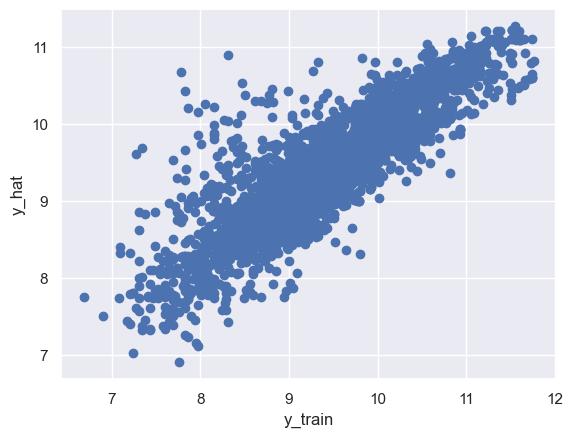

In [69]:
plt.scatter(y_train,y_hat)
plt.xlabel('y_train')
plt.ylabel('y_hat')
plt.show()

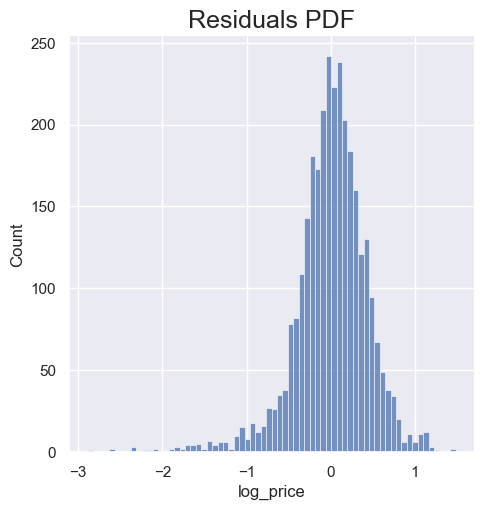

In [71]:
sns.displot(y_train-y_hat)
plt.title('Residuals PDF',size=18)
plt.show()

In [72]:
reg.score(x_train,y_train)

0.744996578792662

## Find Weights and Bias

In [73]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


### Testing

In [74]:
y_hat_test=reg.predict(x_test)

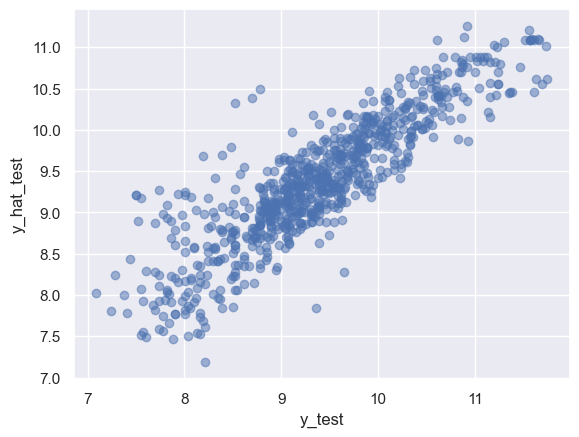

In [77]:
plt.scatter(y_test,y_hat_test,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_hat_test')
plt.show()

In [113]:
df_pf=pd.DataFrame(np.round(np.exp(y_hat_test),1),columns=['Prediction'])

In [114]:
df_pf.sample(5)

,Prediction
45,8512.0
417,3795.1
246,41711.2
351,25951.3
296,21691.0


In [115]:
y_test=y_test.reset_index(drop=True)

In [116]:
df_pf['Target']=np.exp(y_test)
df_pf.sample(5)

,Prediction,Target
403,2839.0,4300.0
259,6067.8,6200.0
144,11969.7,12900.0
301,9782.5,10200.0
760,13443.3,9000.0


In [117]:
df_pf['Residual']=df_pf['Target']-df_pf['Prediction']
df_pf['Residual_Percentage']=np.round(np.absolute(100*df_pf['Residual']/df_pf['Target']),1)

In [118]:
df_pf.sample(5)

,Prediction,Target,Residual,Residual_Percentage
229,7719.7,9300.0,1580.3,17.0
347,26441.0,15900.0,-10541.0,66.3
562,9593.5,11000.0,1406.5,12.8
751,8493.0,12800.0,4307.0,33.6
601,35371.2,34600.0,-771.2,2.2


In [119]:
df_pf.describe()

,Prediction,Target,Residual,Residual_Percentage
count,774.000000,774.000000,774.000000,774.000000
mean,15946.759690,18165.817106,2219.057416,36.256848
std,13133.196664,19967.858908,10871.218876,55.069046
min,1320.600000,1200.000000,-29456.500000,0.100000
25%,7413.675000,6900.000000,-2044.225000,12.125000
50%,11568.150000,11600.000000,142.550000,23.500000
75%,20162.425000,20500.000000,3147.375000,39.600000
max,77403.100000,126000.000000,85106.200000,512.700000


In [121]:
df_pf.sort_values(by=['Residual_Percentage'])

,Prediction,Target,Residual,Residual_Percentage
698,30480.8,30500.0,19.2,0.1
60,12469.2,12500.0,30.8,0.2
742,16960.3,16999.0,38.7,0.2
110,25614.1,25500.0,-114.1,0.4
272,9749.5,9800.0,50.5,0.5
...,...,...,...,...
657,32481.0,6000.0,-26481.0,441.4
162,9954.4,1800.0,-8154.4,453.0
451,35956.5,6500.0,-29456.5,453.2
532,10019.9,1800.0,-8219.9,456.7
